**2024A**

Rebriane Atitha G. (039)

Nabilah Hilmi R. (053)

# **Integration Data**

**Concatenating**

In [1]:
!pip install gdown # untuk menginstall library gdown

In [2]:
import gdown
import pandas as pd

# id file dari drive
file_ids ={
    "1Xemd55BlpbBz6eGLdV25na08an1o0TvM": 2022,
    "1vsciPw28tnT8x8Zfbj3d6_c_oLZnVFSd": 2023,
    "1Kg8AWEcPTPlDkciXRIj8GDrIfkRHeE3y": 2024
}

dfs = []

for files, tahun in file_ids.items():

  # download file
  url = f"https://drive.google.com/uc?id={files}"
  gdown.download(url, f"{tahun}.xlsx", quiet=False)

  # baca file
  df = pd.read_excel(f"{tahun}.xlsx")

  # tambah kolom tahun
  df["Tahun"] = tahun

  dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)
df_all

Downloading...
From: https://drive.google.com/uc?id=1Xemd55BlpbBz6eGLdV25na08an1o0TvM
To: /content/2022.xlsx
100%|██████████| 9.78k/9.78k [00:00<00:00, 15.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vsciPw28tnT8x8Zfbj3d6_c_oLZnVFSd
To: /content/2023.xlsx
100%|██████████| 9.69k/9.69k [00:00<00:00, 15.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Kg8AWEcPTPlDkciXRIj8GDrIfkRHeE3y
To: /content/2024.xlsx
100%|██████████| 9.69k/9.69k [00:00<00:00, 13.7MB/s]


,Provinsi,Produksi Padi - Produksi Padi (ton) (Ton),Produksi Padi - Produksi Beras (ton) (Ton),Tahun
0,Aceh,1509456.46,869572.00,2022
1,Sumatera Utara,2088583.81,1198045.75,2022
2,Sumatera Barat,1373532.19,795306.36,2022
3,Riau,213557.23,122561.42,2022
4,Jambi,277743.83,160667.47,2022
...,...,...,...,...
115,Papua,4609.95,2632.19,2024
116,Papua Selatan,217789.62,124355.12,2024
117,Papua Tengah,6072.38,3467.26,2024
118,Papua Pegunungan,42.38,24.20,2024


In [3]:
from google.colab import files

# simpan hasil integrasi ke file excel baru
df_all.to_csv("Produksi Padi_all.csv", index=False)

# download hasil gabungan
files.download("Produksi Padi_all.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Cleaning Data**

In [4]:
import pandas as pd

file_id = "1fhUPwz0GTlxsY72HpdXkhSoljWRgdUKq" # file yang diambil di drive
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df = pd.read_csv(url)
df.head()

df.info() # untuk mengetahui info tentang file
df.isna().sum() # untuk mengetahui missing value
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Provinsi                                    119 non-null    object 
 1   Produksi Padi - Produksi Padi (ton) (Ton)   113 non-null    float64
 2   Produksi Padi - Produksi Beras (ton) (Ton)  113 non-null    float64
 3   Tahun                                       120 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.9+ KB


,Produksi Padi - Produksi Padi (ton) (Ton),Produksi Padi - Produksi Beras (ton) (Ton),Tahun
count,1.130000e+02,1.130000e+02,120.000000
mean,2.865003e+06,1.650674e+06,2022.975000
std,8.839658e+06,5.093089e+06,0.824647
min,4.238000e+01,2.420000e+01,2022.000000
25%,9.260106e+04,5.185742e+04,2022.000000
50%,4.528318e+05,2.572199e+05,2023.000000
75%,1.538537e+06,8.762735e+05,2024.000000
max,5.474898e+07,3.154052e+07,2024.000000


In [5]:
prov = df["Provinsi"].astype(str).str.strip()

mask_catatan = prov.eq("Catatan")
mask_note = prov.str.contains("<sup", case=False, na=False)  # baris panjang keterangan

df = df[~(mask_catatan | mask_note)].reset_index(drop=True)
df = df[df["Provinsi"].notna()] # buang baris yang provinsinya kosong (sambungan catatan)
df

,Provinsi,Produksi Padi - Produksi Padi (ton) (Ton),Produksi Padi - Produksi Beras (ton) (Ton),Tahun
0,Aceh,1509456.46,869572.00,2022
1,Sumatera Utara,2088583.81,1198045.75,2022
2,Sumatera Barat,1373532.19,795306.36,2022
3,Riau,213557.23,122561.42,2022
4,Jambi,277743.83,160667.47,2022
...,...,...,...,...
113,Papua,4609.95,2632.19,2024
114,Papua Selatan,217789.62,124355.12,2024
115,Papua Tengah,6072.38,3467.26,2024
116,Papua Pegunungan,42.38,24.20,2024


In [6]:
df = df.rename(columns={
    "Produksi Padi - Produksi Padi (ton) (Ton)": "Produksi Padi (Ton)",
    "Produksi Padi - Produksi Beras (ton) (Ton)": "Produksi Beras (Ton)"
})
df.head()

,Provinsi,Produksi Padi (Ton),Produksi Beras (Ton),Tahun
0,Aceh,1509456.46,869572.00,2022
1,Sumatera Utara,2088583.81,1198045.75,2022
2,Sumatera Barat,1373532.19,795306.36,2022
3,Riau,213557.23,122561.42,2022
4,Jambi,277743.83,160667.47,2022


In [7]:
num_cols = ["Produksi Padi (Ton)", "Produksi Beras (Ton)"]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0) # kalau ada string aneh jadi NaN dan missing value diisi 0

In [10]:
# tandai outlier (metode IQR) tanpa menghapus baris
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # kolom baru: True kalau outlier, False kalau normal
    df[f"{col}_Outlier"] = (df[col] < lower) | (df[col] > upper)
df.head()

,Provinsi,Produksi Padi (Ton),Produksi Beras (Ton),Tahun,Produksi Padi (Ton)_Outlier,Produksi Beras (Ton)_Outlier
0,Aceh,1509456.46,869572.00,2022,False,False
1,Sumatera Utara,2088583.81,1198045.75,2022,False,False
2,Sumatera Barat,1373532.19,795306.36,2022,False,False
3,Riau,213557.23,122561.42,2022,False,False
4,Jambi,277743.83,160667.47,2022,False,False


In [11]:
df.to_csv("Produksi_padi_rev.csv", index=False)

# **Exploration Data**

**Cek struktur data**

In [12]:
# Melihat 5 baris pertama untuk memastikan struktur dataframe
df.head()

,Provinsi,Produksi Padi (Ton),Produksi Beras (Ton),Tahun,Produksi Padi (Ton)_Outlier,Produksi Beras (Ton)_Outlier
0,Aceh,1509456.46,869572.00,2022,False,False
1,Sumatera Utara,2088583.81,1198045.75,2022,False,False
2,Sumatera Barat,1373532.19,795306.36,2022,False,False
3,Riau,213557.23,122561.42,2022,False,False
4,Jambi,277743.83,160667.47,2022,False,False


In [13]:
# Mengecek struktur dan tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 117
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Provinsi                      117 non-null    object 
 1   Produksi Padi (Ton)           117 non-null    float64
 2   Produksi Beras (Ton)          117 non-null    float64
 3   Tahun                         117 non-null    int64  
 4   Produksi Padi (Ton)_Outlier   117 non-null    bool   
 5   Produksi Beras (Ton)_Outlier  117 non-null    bool   
dtypes: bool(2), float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [14]:
# Statistik deskriptif untuk produksi padi dan beras
df.describe()

,Produksi Padi (Ton),Produksi Beras (Ton),Tahun
count,1.170000e+02,1.170000e+02,117.000000
mean,2.767055e+06,1.594240e+06,2023.000000
std,8.701635e+06,5.013565e+06,0.820008
min,0.000000e+00,0.000000e+00,2022.000000
25%,7.748979e+04,4.477738e+04,2022.000000
50%,3.535133e+05,2.042918e+05,2023.000000
75%,1.509456e+06,8.695720e+05,2024.000000
max,5.474898e+07,3.154052e+07,2024.000000


### Jumlah Provinsi per Tahun

In [15]:
# Mengecek apakah semua tahun memiliki jumlah provinsi yang sama
df.groupby("Tahun")["Provinsi"].count()

,Provinsi
Tahun,
2022,39
2023,39
2024,39


### Grafik Line

**Tren Nasional**

In [16]:
# Menghitung total produksi padi per tahun
total_tahunan = df.groupby("Tahun")["Produksi Padi (Ton)"].sum()
total_tahunan

,Produksi Padi (Ton)
Tahun,
2022,1.094980e+08
2023,1.079620e+08
2024,1.062855e+08


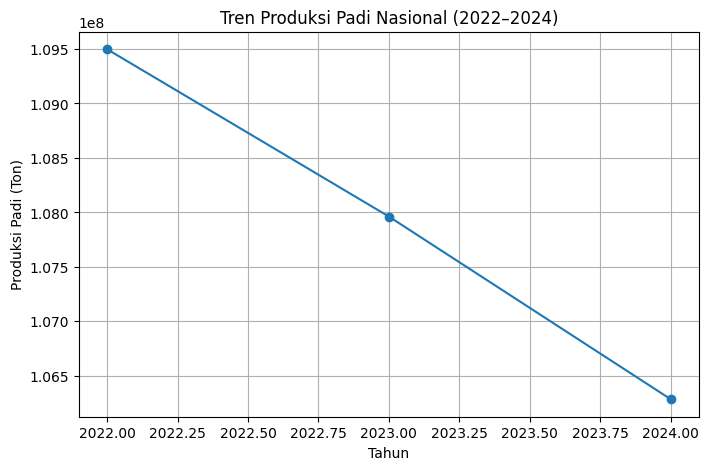

In [17]:
# Visualisai tren produksi nasional 2022-2024
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5)) # Mengatur ukuran grafik
plt.plot(total_tahunan.index, total_tahunan.values, marker='o') # plot garis untuk melihat kenaikan/penurunan tahunan
plt.title("Tren Produksi Padi Nasional (2022–2024)") # Judul grafik
plt.xlabel("Tahun") # Label sumbu x
plt.ylabel("Produksi Padi (Ton)") # Label sumbu y
plt.grid(True) # Menambahkan garis bantu
plt.show() # menampilkan grafik

### YOY (Year-Over-Year)

In [18]:
# Menghitung presentase perubahan tahunan
yoy = total_tahunan.pct_change() * 100 # Menghitung presentase kenaikan/penuruan tiap tahun
yoy

,Produksi Padi (Ton)
Tahun,
2022,NaN
2023,-1.402737
2024,-1.552892


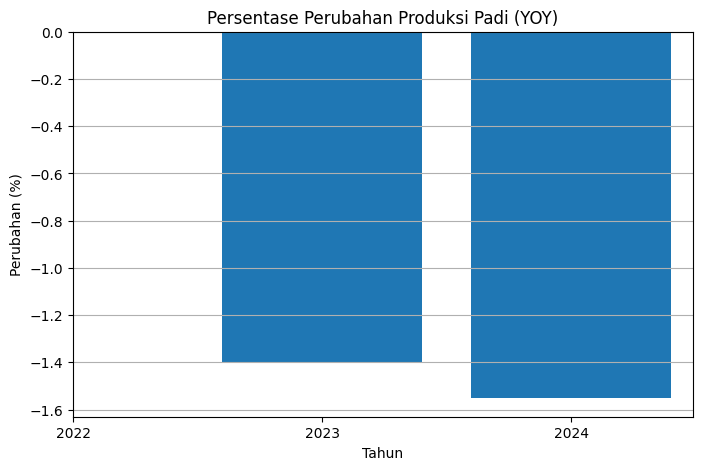

In [19]:
# Visualisasi YOY (Year-over-Year)
plt.figure(figsize=(8,5))
plt.bar(yoy.index, yoy.values)
plt.title("Persentase Perubahan Produksi Padi (YOY)")
plt.xlabel("Tahun")
plt.ylabel("Perubahan (%)")
plt.grid(axis='y')
plt.xticks(list(yoy.index.astype(int)), list(yoy.index.astype(int)))
plt.show()

### Top-Bottom Ranking

**Produksi Padi per Provinsi per Tahun**

In [20]:
# Membuat pivot tabel (provinsi x tahun) untuk analisis per provinsi
pprov = df.groupby(["Provinsi", "Tahun"])["Produksi Padi (Ton)"].sum().unstack()
pprov.head()

Tahun,2022,2023,2024
Provinsi,,,
Aceh,1509456.46,1404234.82,1659966.28
Bali,680601.60,673580.65,635473.35
Banten,1788582.60,1686483.29,1550623.46
Bengkulu,281610.09,286684.43,272848.55
DI Yogyakarta,561699.53,534113.69,452831.77


**Top 10 Provinsi dengan Produksi Tertinggi per Tahun**

In [21]:
top10 = (
    df.groupby(["Tahun", "Provinsi"])["Produksi Padi (Ton)"]
    .sum()
    .reset_index()
)

for t in top10["Tahun"].unique():
    print(f"\nTop 10 Produksi Padi Tahun {t}") # Pemisah output per tahun
    display(
        top10[top10["Tahun"] == t]
        .sort_values("Produksi Padi (Ton)", ascending=False)
        .head(10) # Hanya menampilkan 10 provinsi terbesar
    )


Top 10 Produksi Padi Tahun 2022


,Tahun,Provinsi,Produksi Padi (Ton)
7,2022,Indonesia,54748977.08
11,2022,Jawa Timur,9526515.67
9,2022,Jawa Barat,9433723.09
10,2022,Jawa Tengah,9356445.49
32,2022,Sulawesi Selatan,5360169.37
37,2022,Sumatera Selatan,2775069.26
19,2022,Lampung,2688159.74
38,2022,Sumatera Utara,2088583.81
2,2022,Banten,1788582.60
0,2022,Aceh,1509456.46



Top 10 Produksi Padi Tahun 2023


,Tahun,Provinsi,Produksi Padi (Ton)
46,2023,Indonesia,53980993.19
50,2023,Jawa Timur,9710661.33
48,2023,Jawa Barat,9140039.20
49,2023,Jawa Tengah,9084107.53
71,2023,Sulawesi Selatan,4876386.11
76,2023,Sumatera Selatan,2832773.92
58,2023,Lampung,2757898.19
77,2023,Sumatera Utara,2087474.15
41,2023,Banten,1686483.29
61,2023,Nusa Tenggara Barat,1538536.92



Top 10 Produksi Padi Tahun 2024


,Tahun,Provinsi,Produksi Padi (Ton)
85,2024,Indonesia,53142726.65
89,2024,Jawa Timur,9270435.29
88,2024,Jawa Tengah,8891297.05
87,2024,Jawa Barat,8626879.91
110,2024,Sulawesi Selatan,4818429.39
115,2024,Sumatera Selatan,2909411.67
97,2024,Lampung,2791347.53
116,2024,Sumatera Utara,2204875.51
78,2024,Aceh,1659966.28
80,2024,Banten,1550623.46


**Provinsi dengan Kenaikan/Penurunan Terbesar**

In [22]:
# Mencari provinsi yang mengalami kenaikan & penurunan terbesar
diff = pprov.diff(axis=1) # Menghitung selisih antar tahun per provinsi

diff = diff[[2023, 2024]]
diff.columns = ["2022→2023", "2023→2024"]

print("\nProvinsi dengan Kenaikan Terbesar 2022–2023:")
display(diff.sort_values("2022→2023", ascending=False).head())

print("\nProvinsi dengan Penurunan Terbesar 2022–2023:")
display(diff.sort_values("2022→2023").head())

print("\nProvinsi dengan Kenaikan Terbesar 2023–2024:")
display(diff.sort_values("2023→2024", ascending=False).head())

print("\nProvinsi dengan Penurunan Terbesar 2023–2024:")
display(diff.sort_values("2023→2024").head())


Provinsi dengan Kenaikan Terbesar 2022–2023:


,2022→2023,2023→2024
Provinsi,,
Jawa Timur,184145.66,-440226.04
Papua Selatan,183627.83,34161.79
Sumatera Barat,108936.60,-126000.86
Nusa Tenggara Barat,85591.45,-85128.55
Sulawesi Tengah,76958.71,-59431.02



Provinsi dengan Penurunan Terbesar 2022–2023:


,2022→2023,2023→2024
Provinsi,,
Indonesia,-767983.89,-838266.54
Sulawesi Selatan,-483783.26,-57956.72
Jawa Barat,-293683.89,-513159.29
Jawa Tengah,-272337.96,-192810.48
Papua,-190183.02,849.50



Provinsi dengan Kenaikan Terbesar 2023–2024:


,2022→2023,2023→2024
Provinsi,,
Aceh,-105221.64,255731.46
Kalimantan Selatan,56126.53,154022.20
Sumatera Utara,-1109.66,117401.36
Sumatera Selatan,57704.66,76637.75
Sulawesi Tenggara,449.22,76428.83



Provinsi dengan Penurunan Terbesar 2023–2024:


,2022→2023,2023→2024
Provinsi,,
Indonesia,-767983.89,-838266.54
Jawa Barat,-293683.89,-513159.29
Jawa Timur,184145.66,-440226.04
Jawa Tengah,-272337.96,-192810.48
Banten,-102099.31,-135859.83


### Bar Chart + Heatmap

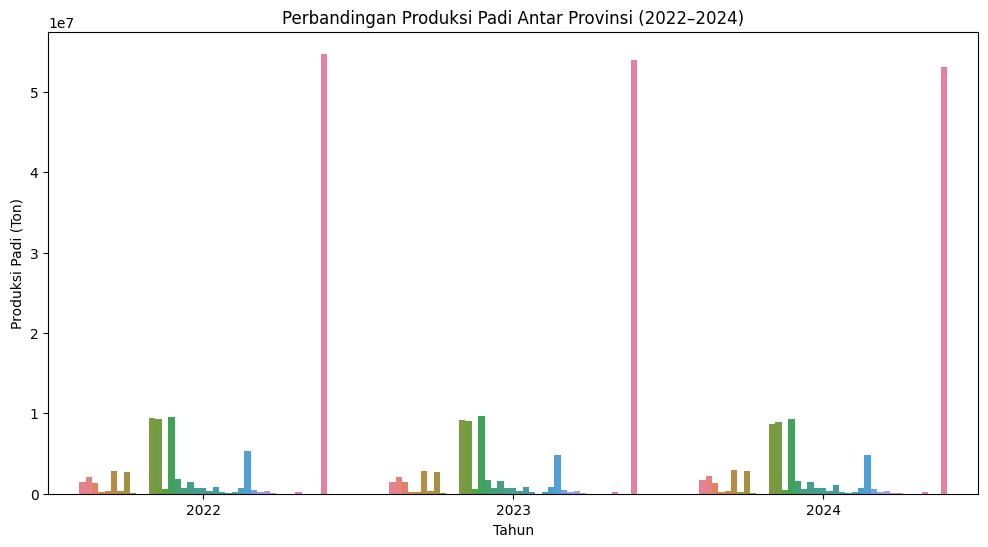

In [23]:
# Bar chart perbandingan provinsi untuk 2022-2024
import seaborn as sns

plt.figure(figsize=(12,6)) # Mengatur ukuran grafik
sns.barplot(
    data=df,
    x="Tahun",
    y="Produksi Padi (Ton)",
    hue="Provinsi",
    errorbar=None
)
plt.title("Perbandingan Produksi Padi Antar Provinsi (2022–2024)")
plt.legend([],[], frameon=False)  # hilangkan legend karena terlalu banyak
plt.show()

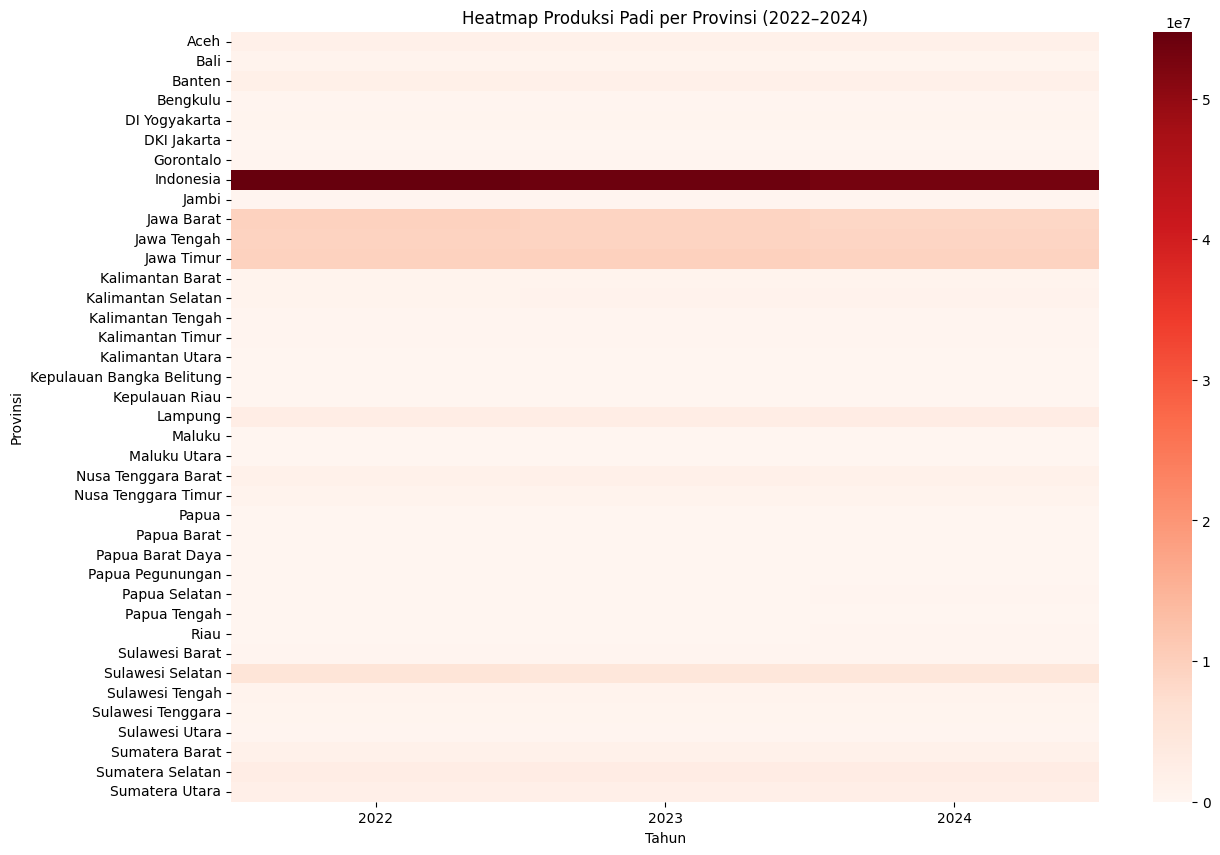

In [24]:
# Heatmap produksi padi per provinsi setiap tahun
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(pprov, cmap="Reds", annot=False)
# Warna biru-hijau menunjukkan variasi produksi antar provinsi
# Lebih gelap = produksi lebih tinggi

plt.title("Heatmap Produksi Padi per Provinsi (2022–2024)")
plt.xlabel("Tahun")
plt.ylabel("Provinsi")
plt.show()

### Boxplot

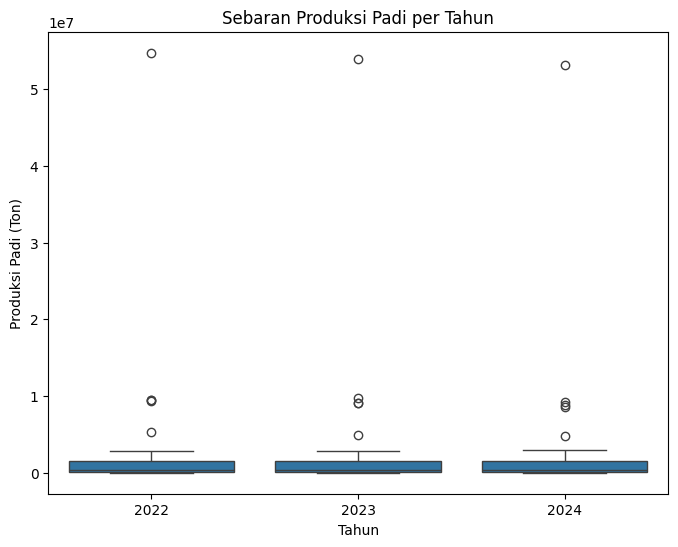

In [25]:
# Boxplot untuk melihat sebaran dan outlier produksi padi tiap tahun
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Tahun", y="Produksi Padi (Ton)")
plt.title("Sebaran Produksi Padi per Tahun")
plt.show()